<a href="https://colab.research.google.com/github/svikram85/models/blob/master/Voids_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connecting with postgres Database**

In [2]:
pip install psycopg2-binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 16.3 MB/s eta 0:00:00


In [3]:
import psycopg2
import csv

In [4]:
try:
    connection = psycopg2.connect(
        host="voids-jobs.c2wwnfcaisej.eu-central-1.rds.amazonaws.com",
        database="postgres",
        user="jobs_ro",
        password= "ilovecaseslol"
    )
    database="postgres"
    cursor = connection.cursor()
    print("Connected to the database")

    # Perform database operations here
    table_name = "campaign_performance"

    # Execute a SELECT query on the specified table
    cursor.execute('SELECT * FROM google_ads.campaign_performance')

    # Fetch and print the query results
    rows = cursor.fetchall()

    csv_file_path = "campaign_performance.csv"

    # Write the data to the CSV file
    with open(csv_file_path, "w", newline="") as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write the header row with column names
        column_names = [desc[0] for desc in cursor.description]
        csv_writer.writerow(column_names)

        # Write the data rows
        csv_writer.writerows(rows)

    print(f"Data from '{table_name}' has been exported to '{csv_file_path}'")

    cursor.close()
    connection.close()

    cursor.close()
    connection.close()
    print("Connection closed")

except (Exception, psycopg2.Error) as error:
    print("Error while connecting to PostgreSQL:", error)

Connected to the database
Data from 'campaign_performance' has been exported to 'campaign_performance.csv'
Connection closed


In [5]:
try:
    connection = psycopg2.connect(
        host="voids-jobs.c2wwnfcaisej.eu-central-1.rds.amazonaws.com",
        database="postgres",
        user="jobs_ro",
        password= "ilovecaseslol"
    )
    database="postgres"
    cursor = connection.cursor()
    print("Connected to the database")

    # Perform database operations here
    table_name = "campaign_spend"

    # Execute a SELECT query on the specified table
    cursor.execute('SELECT * FROM google_ads.campaign_spend')

    # Fetch and print the query results
    rows = cursor.fetchall()

    csv_file_path = "campaign_spend.csv"

    # Write the data to the CSV file
    with open(csv_file_path, "w", newline="") as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write the header row with column names
        column_names = [desc[0] for desc in cursor.description]
        csv_writer.writerow(column_names)

        # Write the data rows
        csv_writer.writerows(rows)

    print(f"Data from '{table_name}' has been exported to '{csv_file_path}'")

    cursor.close()
    connection.close()

    cursor.close()
    connection.close()
    print("Connection closed")

except (Exception, psycopg2.Error) as error:
    print("Error while connecting to PostgreSQL:", error)

Connected to the database
Data from 'campaign_spend' has been exported to 'campaign_spend.csv'
Connection closed


In [7]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Path to your service account JSON key file
credentials = ServiceAccountCredentials.from_json_keyfile_name(
    'jobs-398713-d8caacaf8ab0.json',  # Replace with the path to your JSON key file
    ['https://www.googleapis.com/auth/spreadsheets', 'https://www.googleapis.com/auth/drive']
)

gc = gspread.authorize(credentials)

# Replace 'Your Google Sheet URL' with the actual URL of your Google Sheet
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1rU5pdSMJ3UAIwXHzuxBgwYvgn-o9nkosw7TGhfg_Bhw/edit?usp=sharing'
spreadsheet = gc.open_by_url(spreadsheet_url)

worksheet_list = spreadsheet.worksheets()

# Choose the first worksheet (you can change this to access a different worksheet)
chosen_worksheet = worksheet_list[0]

# Read data from the worksheet
data = chosen_worksheet.get_all_values()

# Define the CSV file path where you want to save the data
csv_file_path = 'supplychain_data.csv'

# Write the data to the CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerows(data)

print(f'Data from Google Sheet saved to {csv_file_path}')

Data from Google Sheet saved to supplychain_data.csv


In [11]:
import pandas as pd
campaign_performance_data = pd.read_csv('campaign_performance.csv')
campaign_spend_data = pd.read_csv('campaign_spend.csv')
sales_data = pd.read_json('sales_data_nexasun.json',lines=True)
supplychain_data = pd.read_csv('supplychain_data.csv')
weather_data =  pd.read_csv('open-meteo-weather.csv',skiprows=range(0, 2))

In [12]:
weather_data =  pd.read_csv('open-meteo-weather.csv',skiprows=range(0, 2))

In [13]:
campaign_performance_data.head()

,date,campaign_id,variant_id,impressions
0,2022-06-28 00:00:00,6401833,40570570768535,11210
1,2022-07-01 00:00:00,6401833,40570570768535,7287
2,2022-07-05 00:00:00,6401833,40570570768535,20392
3,2022-07-06 00:00:00,6401833,40570570768535,60247
4,2022-07-07 00:00:00,6401833,40570570768535,75973


In [14]:
campaign_spend_data.head()

,date,campaign_id,marketing_spend,variant_id
0,2022-06-28 00:00:00,6401833,73.0,40570570768535
1,2022-07-01 00:00:00,6401833,47.0,40570570768535
2,2022-07-05 00:00:00,6401833,61.0,40570570768535
3,2022-07-06 00:00:00,6401833,224.0,40570570768535
4,2022-07-07 00:00:00,6401833,194.0,40570570768535


In [15]:
sales_data.head()

,order_id,date,time,variant_id,price,discount,sales_quantity
0,2113134,2020-10-07,1602087445157,41429400879255,19.95,0.00,2
1,5529610,2020-10-07,1602086318042,41429400879255,19.95,0.00,1
2,8606644,2020-10-07,1602087445157,41429400879255,19.95,0.00,2
3,8725946,2020-10-07,1602086318042,41429400879255,19.95,0.00,1
4,5222144,2020-10-08,1602175099124,41429400879255,19.95,0.08,1


In [16]:
supplychain_data.head()

,variant_id,variant_title,color,design,weight,lens_material,frame_material,uv_protection,current_inventory,lead_time,cost_of_goods_sold,rrp
0,31227200549344,SolarWave Aviators,Gold,Classic Aviator,28,Polycarbonate,Metal,UV400,64,30,7.86,49.95
1,41429400879255,AquaVue Wayfarers,Matte Black,Retro Square,32,Glass,Acetate,UV400,28992,30,4.53,19.95
2,40570570768535,Zenith Polar Pros,Tortoise,Oversized Round,30,Polarized,Acetate,UV400,1695,90,18.89,24.95


In [17]:
weather_data.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm)
0,2020-10-07,12.2,9.3,10.4,6.6
1,2020-10-08,13.5,7.7,10.5,5.2
2,2020-10-09,13.2,9.5,11.2,4.1
3,2020-10-10,11.2,6.7,9.2,0.5
4,2020-10-11,11.0,5.5,7.7,1.1


In [18]:
sales_data.isna().sum()

order_id           0
date               0
time               0
variant_id         0
price             76
discount          32
sales_quantity     0
dtype: int64

In [19]:
campaign_performance_data['date'] = pd.to_datetime(campaign_performance_data['date'])
campaign_performance_data['date']= campaign_performance_data['date'].dt.date

In [20]:
campaign_spend_data['date'] = pd.to_datetime(campaign_spend_data['date'])
campaign_spend_data['date']= campaign_spend_data['date'].dt.date

In [21]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['date']= sales_data['date'].dt.date

In [22]:
weather_data = weather_data.rename(columns={'time':'date'})

In [23]:
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['date']= weather_data['date'].dt.date

In [24]:
weather_data.head()

,date,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm)
0,2020-10-07,12.2,9.3,10.4,6.6
1,2020-10-08,13.5,7.7,10.5,5.2
2,2020-10-09,13.2,9.5,11.2,4.1
3,2020-10-10,11.2,6.7,9.2,0.5
4,2020-10-11,11.0,5.5,7.7,1.1


In [25]:
campaign_performance_data.head()

,date,campaign_id,variant_id,impressions
0,2022-06-28,6401833,40570570768535,11210
1,2022-07-01,6401833,40570570768535,7287
2,2022-07-05,6401833,40570570768535,20392
3,2022-07-06,6401833,40570570768535,60247
4,2022-07-07,6401833,40570570768535,75973


In [26]:
sales_data.head()

,order_id,date,time,variant_id,price,discount,sales_quantity
0,2113134,2020-10-07,1602087445157,41429400879255,19.95,0.00,2
1,5529610,2020-10-07,1602086318042,41429400879255,19.95,0.00,1
2,8606644,2020-10-07,1602087445157,41429400879255,19.95,0.00,2
3,8725946,2020-10-07,1602086318042,41429400879255,19.95,0.00,1
4,5222144,2020-10-08,1602175099124,41429400879255,19.95,0.08,1


In [27]:
merged_marketing_data = campaign_performance_data.merge(campaign_spend_data, on=['date', 'variant_id','campaign_id'], how='outer')

In [28]:
merged_marketing_data.shape

(263, 5)

In [29]:
total_merged_marketing_data=merged_marketing_data.groupby(['date','variant_id'])[['impressions','marketing_spend']].sum().reset_index()

In [30]:
sales_data.head()

,order_id,date,time,variant_id,price,discount,sales_quantity
0,2113134,2020-10-07,1602087445157,41429400879255,19.95,0.00,2
1,5529610,2020-10-07,1602086318042,41429400879255,19.95,0.00,1
2,8606644,2020-10-07,1602087445157,41429400879255,19.95,0.00,2
3,8725946,2020-10-07,1602086318042,41429400879255,19.95,0.00,1
4,5222144,2020-10-08,1602175099124,41429400879255,19.95,0.08,1


In [31]:
sales_data['price_total']= sales_data['price']*sales_data['sales_quantity']
sales_data['discount_total']= sales_data['discount']*sales_data['sales_quantity']

In [32]:
modify_sales_data = sales_data.groupby(['date','variant_id'])['sales_quantity','price_total','discount_total'].sum().reset_index()

<ipython-input-32-66d16cae31cc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  modify_sales_data = sales_data.groupby(['date','variant_id'])['sales_quantity','price_total','discount_total'].sum().reset_index()


In [33]:
modify_sales_data.head()

,date,variant_id,sales_quantity,price_total,discount_total
0,2020-10-07,41429400879255,6,119.7,0.00
1,2020-10-08,41429400879255,4,79.8,0.36
2,2020-10-09,41429400879255,4,39.9,0.08
3,2020-10-10,41429400879255,2,0.0,0.12
4,2020-10-19,41429400879255,16,319.2,0.64


In [34]:
modify_sales_data['avg_price']= modify_sales_data['price_total']/modify_sales_data['sales_quantity']
modify_sales_data['avg_dicount']= modify_sales_data['discount_total']/modify_sales_data['sales_quantity']

In [35]:
modify_sales_data.drop(columns=['price_total','discount_total'],inplace=True)

In [36]:
modify_sales_data['date'] = pd.to_datetime(modify_sales_data['date'])
modify_sales_data['date']= modify_sales_data['date'].dt.date

In [37]:
modify_sales_data.head()

,date,variant_id,sales_quantity,avg_price,avg_dicount
0,2020-10-07,41429400879255,6,19.950,0.00
1,2020-10-08,41429400879255,4,19.950,0.09
2,2020-10-09,41429400879255,4,9.975,0.02
3,2020-10-10,41429400879255,2,0.000,0.06
4,2020-10-19,41429400879255,16,19.950,0.04


In [38]:
marketing_sales_data = total_merged_marketing_data.merge(modify_sales_data, on=['date', 'variant_id'], how='outer')

In [39]:
marketing_sales_data.head()

,date,variant_id,impressions,marketing_spend,sales_quantity,avg_price,avg_dicount
0,2022-06-28,40570570768535,11210.0,73.0,6.0,24.95,0.013333
1,2022-06-28,41429400879255,14006.0,69.0,16.0,19.95,0.062500
2,2022-07-01,40570570768535,7287.0,47.0,45.0,24.95,0.053333
3,2022-07-03,41429400879255,7575.0,60.0,17.0,19.95,0.100000
4,2022-07-04,41429400879255,17305.0,126.0,95.0,19.95,0.030526


In [40]:
marketing_sales_data.isna().sum()

date                  0
variant_id            0
impressions        1392
marketing_spend    1392
sales_quantity       54
avg_price            54
avg_dicount          54
dtype: int64

In [41]:
marketing_sales_data.shape

(1637, 7)

In [42]:
marketing_sales_data = marketing_sales_data.sort_values(by='date', ascending=True)

In [43]:
marketing_sales_data.fillna(0,inplace=True)

In [44]:
marketing_sales_data.set_index('date',inplace=True)

In [45]:
marketing_sales_data['variant_id'].unique()

array([41429400879255, 40570570768535, 31227200549344,    70570768535])

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

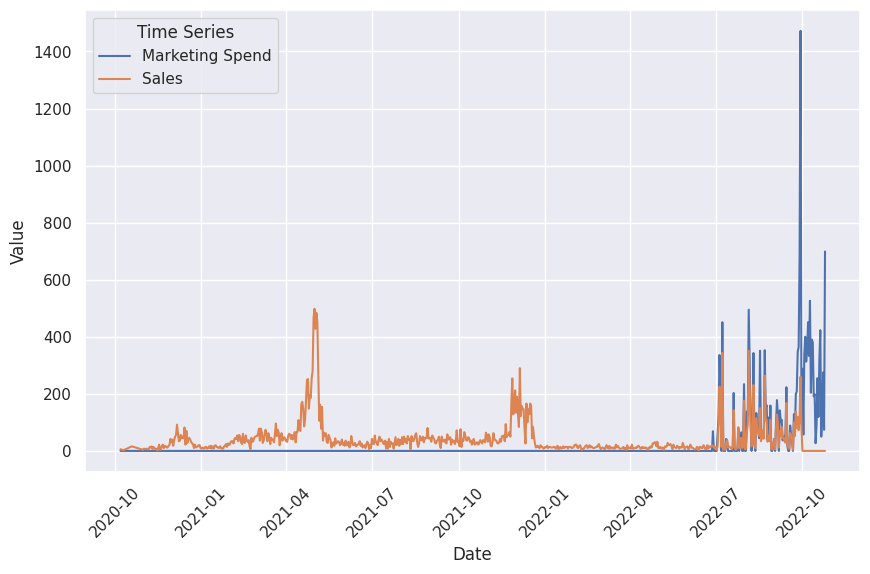

In [47]:
temp =marketing_sales_data[marketing_sales_data['variant_id']==41429400879255]
sns.set(style="darkgrid")  # Set the plot style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot TimeSeries1
sns.lineplot(data=temp,x=temp.index, y='marketing_spend',label='Marketing Spend')

# Plot TimeSeries2
sns.lineplot(data=temp,x=temp.index, y='sales_quantity', label='Sales')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Time Series')
plt.xticks(rotation=45)

# Show the plot
plt.show()

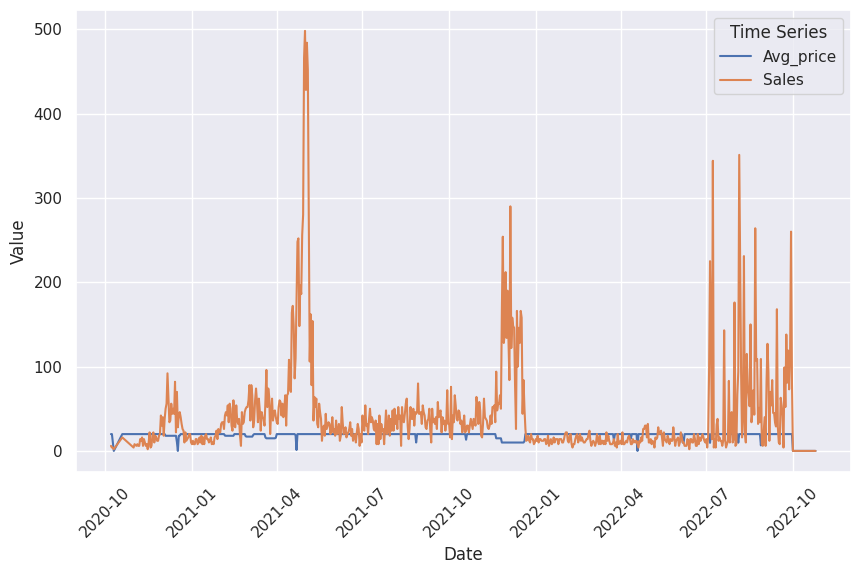

In [48]:
sns.set(style="darkgrid")  # Set the plot style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot TimeSeries1
sns.lineplot(data=temp,x=temp.index, y='avg_price',label='Avg_price')

# Plot TimeSeries2
sns.lineplot(data=temp,x=temp.index, y='sales_quantity', label='Sales')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Time Series')
plt.xticks(rotation=45)

# Show the plot
plt.show()

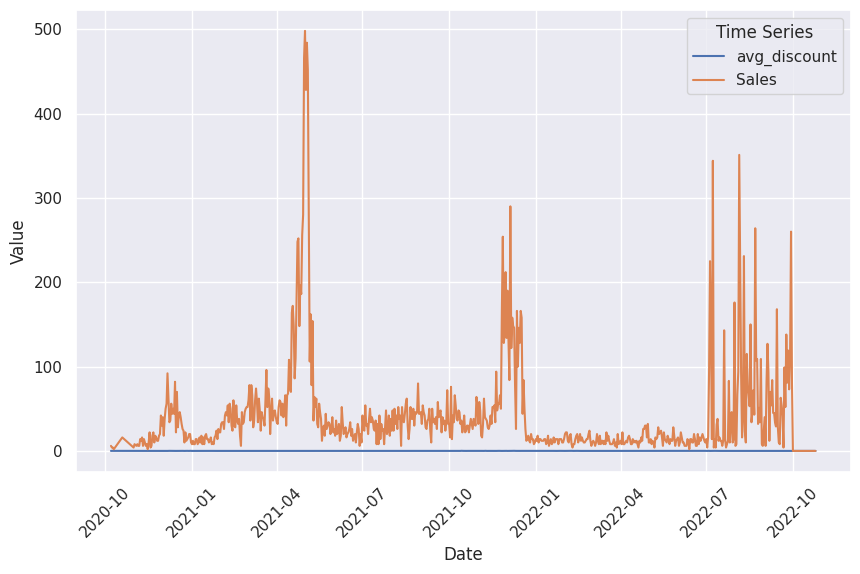

In [49]:
sns.set(style="darkgrid")  # Set the plot style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot TimeSeries1
sns.lineplot(data=temp,x=temp.index, y='avg_dicount',label='avg_discount')

# Plot TimeSeries2
sns.lineplot(data=temp,x=temp.index, y='sales_quantity', label='Sales')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Time Series')
plt.xticks(rotation=45)

# Show the plot
plt.show()

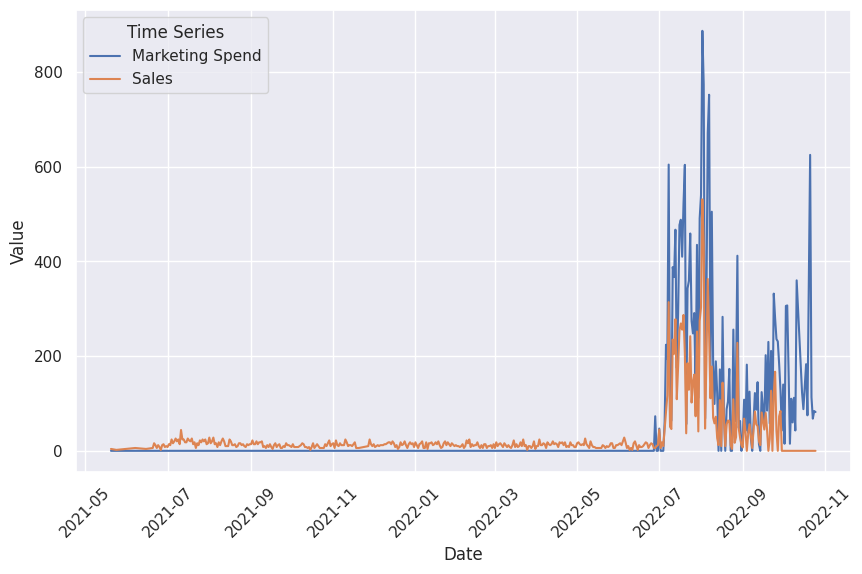

In [50]:
temp =marketing_sales_data[marketing_sales_data['variant_id']==40570570768535]
sns.set(style="darkgrid")  # Set the plot style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot TimeSeries1
sns.lineplot(data=temp,x=temp.index, y='marketing_spend',label='Marketing Spend')

# Plot TimeSeries2
sns.lineplot(data=temp,x=temp.index, y='sales_quantity', label='Sales')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Time Series')
plt.xticks(rotation=45)

# Show the plot
plt.show()

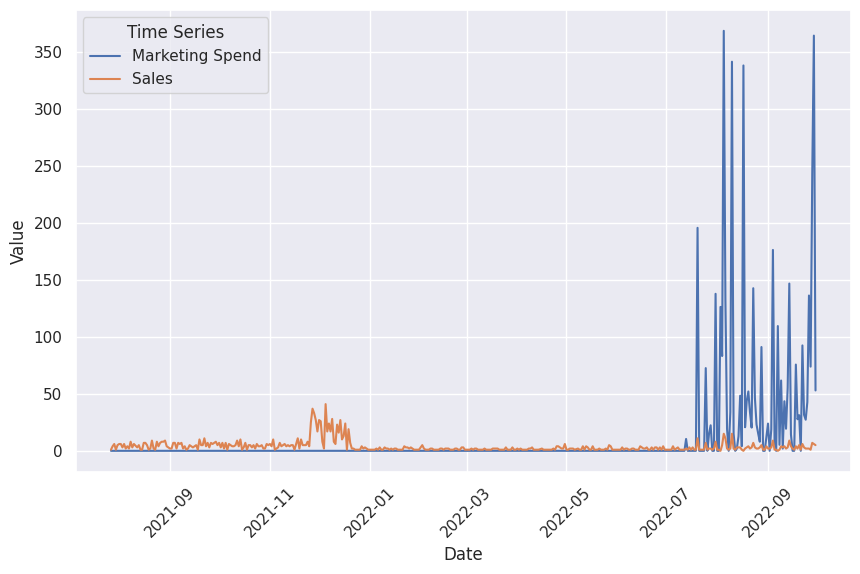

In [51]:
temp =marketing_sales_data[marketing_sales_data['variant_id']==31227200549344]
sns.set(style="darkgrid")  # Set the plot style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot TimeSeries1
sns.lineplot(data=temp,x=temp.index, y='marketing_spend',label='Marketing Spend')

# Plot TimeSeries2
sns.lineplot(data=temp,x=temp.index, y='sales_quantity', label='Sales')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Time Series')
plt.xticks(rotation=45)

# Show the plot
plt.show()

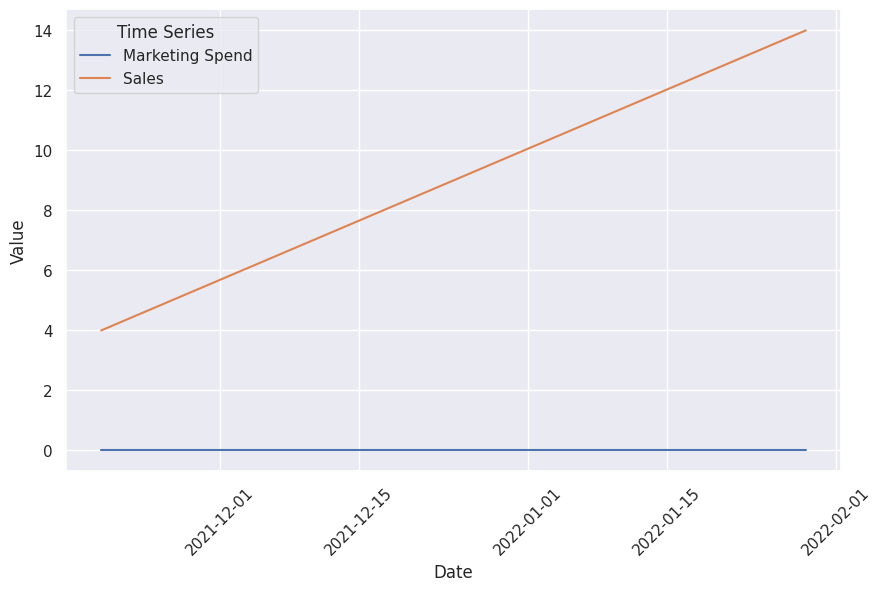

In [52]:
temp =marketing_sales_data[marketing_sales_data['variant_id']==70570768535]
sns.set(style="darkgrid")  # Set the plot style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot TimeSeries1
sns.lineplot(data=temp,x=temp.index, y='marketing_spend',label='Marketing Spend')

# Plot TimeSeries2
sns.lineplot(data=temp,x=temp.index, y='sales_quantity', label='Sales')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Time Series')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [68]:
marketing_sales_data.head()

,index,date,variant_id,impressions,marketing_spend,sales_quantity,avg_price,avg_dicount
0,0,2020-10-07,41429400879255,0.0,0.0,6.0,19.950,0.00
1,1,2020-10-08,41429400879255,0.0,0.0,4.0,19.950,0.09
2,2,2020-10-09,41429400879255,0.0,0.0,4.0,9.975,0.02
3,3,2020-10-10,41429400879255,0.0,0.0,2.0,0.000,0.06
4,4,2020-10-19,41429400879255,0.0,0.0,16.0,19.950,0.04


In [54]:
marketing_sales_data['variant_id'].replace(70570768535,40570570768535,inplace=True)

In [55]:
marketing_sales_data['variant_id'].unique()

array([41429400879255, 40570570768535, 31227200549344])

In [56]:
weather_data.rename(columns={
    'temperature_2m_max (°C)':'temp_max',
    'temperature_2m_min (°C)':'temp_min',
    'temperature_2m_mean (°C)':'temp_mean',
    'precipitation_sum (mm)':'precip'
},inplace=True)

In [61]:
marketing_sales_data.reset_index(inplace=True)

In [62]:
start = marketing_sales_data['date'].min()
end = marketing_sales_data['date'].max()
date_range = pd.date_range(start=start, end=end, freq='D')

In [63]:
dates_1 = pd.DataFrame()
dates_1['date']=date_range
dates_1['variant_id']=41429400879255

In [64]:
dates_2 = pd.DataFrame()
dates_2['date']=date_range
dates_2['variant_id']=40570570768535

In [65]:
dates_3 = pd.DataFrame()
dates_3['date']=date_range
dates_3['variant_id']=31227200549344

In [66]:
time_series_data =pd.concat([dates_1,dates_2,dates_3])

In [71]:
marketing_sales_data.drop(columns='index',inplace=True)

In [72]:
marketing_sales_data['date'] = pd.to_datetime(marketing_sales_data['date'])

In [73]:
marketing_sales_data_comp = time_series_data.merge(marketing_sales_data, on=['date','variant_id'], how='left')

In [74]:
marketing_sales_data_comp.fillna(0,inplace= True)

In [75]:
marketing_sales_data =marketing_sales_data_comp
marketing_sales_data.set_index('date',inplace=True)

In [76]:
marketing_sales_data_final = marketing_sales_data.merge(weather_data, left_index=True, right_index=True, how='left')

In [77]:
marketing_sales_data_final.head(100)

,variant_id,impressions,marketing_spend,sales_quantity,avg_price,avg_dicount,temp_max,temp_min,temp_mean,precip
date,,,,,,,,,,
2020-10-07,41429400879255,0.0,0.0,6.0,19.95,0.000000,12.2,9.3,10.4,6.6
2020-10-07,40570570768535,0.0,0.0,0.0,0.00,0.000000,12.2,9.3,10.4,6.6
2020-10-07,31227200549344,0.0,0.0,0.0,0.00,0.000000,12.2,9.3,10.4,6.6
2020-10-08,41429400879255,0.0,0.0,4.0,19.95,0.090000,13.5,7.7,10.5,5.2
2020-10-08,40570570768535,0.0,0.0,0.0,0.00,0.000000,13.5,7.7,10.5,5.2
...,...,...,...,...,...,...,...,...,...,...
2020-11-07,31227200549344,0.0,0.0,0.0,0.00,0.000000,10.9,0.0,4.8,0.0
2020-11-08,41429400879255,0.0,0.0,12.0,19.95,0.076667,11.8,2.8,6.6,0.0
2020-11-08,40570570768535,0.0,0.0,0.0,0.00,0.000000,11.8,2.8,6.6,0.0


In [78]:
marketing_sales_data_final['variant_id'].unique()

array([41429400879255, 40570570768535, 31227200549344])

In [79]:
marketing_sales_data_final.reset_index(inplace=True)

In [80]:
marketing_sales_data_final['date'] =pd.to_datetime(marketing_sales_data_final['date'])

In [95]:
marketing_sales_data_final['date'] = pd.to_datetime(marketing_sales_data_final['date'])
marketing_sales_data_final['day'] = marketing_sales_data_final['date'].dt.day.astype('int')
marketing_sales_data_final['month'] = marketing_sales_data_final['date'].dt.month.astype('int')
marketing_sales_data_final['year'] = marketing_sales_data_final['date'].dt.year
marketing_sales_data_final['quarter'] = marketing_sales_data_final['date'].dt.quarter
marketing_sales_data_final['weekday'] = marketing_sales_data_final['date'].dt.weekday.astype('string')


In [96]:
marketing_sales_data_final.head()

,date,variant_id,impressions,marketing_spend,sales_quantity,avg_price,avg_dicount,temp_max,temp_min,temp_mean,precip,day,month,year,quarter,weekday
0,2020-10-07,41429400879255,0.0,0.0,6.0,19.95,0.00,12.2,9.3,10.4,6.6,7,10,2020,4,2
1,2020-10-07,40570570768535,0.0,0.0,0.0,0.00,0.00,12.2,9.3,10.4,6.6,7,10,2020,4,2
2,2020-10-07,31227200549344,0.0,0.0,0.0,0.00,0.00,12.2,9.3,10.4,6.6,7,10,2020,4,2
3,2020-10-08,41429400879255,0.0,0.0,4.0,19.95,0.09,13.5,7.7,10.5,5.2,8,10,2020,4,3
4,2020-10-08,40570570768535,0.0,0.0,0.0,0.00,0.00,13.5,7.7,10.5,5.2,8,10,2020,4,3


# **Training Model for forecasting **

In [97]:
marketing_sales_data_final['variant_id'] = marketing_sales_data_final['variant_id'].astype('category')

In [98]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [99]:
marketing_sales_data_final.columns

Index(['date', 'variant_id', 'impressions', 'marketing_spend',
       'sales_quantity', 'avg_price', 'avg_dicount', 'temp_max', 'temp_min',
       'temp_mean', 'precip', 'day', 'month', 'year', 'quarter', 'weekday'],
      dtype='object')

In [100]:
marketing_sales_data_final.head()

,date,variant_id,impressions,marketing_spend,sales_quantity,avg_price,avg_dicount,temp_max,temp_min,temp_mean,precip,day,month,year,quarter,weekday
0,2020-10-07,41429400879255,0.0,0.0,6.0,19.95,0.00,12.2,9.3,10.4,6.6,7,10,2020,4,2
1,2020-10-07,40570570768535,0.0,0.0,0.0,0.00,0.00,12.2,9.3,10.4,6.6,7,10,2020,4,2
2,2020-10-07,31227200549344,0.0,0.0,0.0,0.00,0.00,12.2,9.3,10.4,6.6,7,10,2020,4,2
3,2020-10-08,41429400879255,0.0,0.0,4.0,19.95,0.09,13.5,7.7,10.5,5.2,8,10,2020,4,3
4,2020-10-08,40570570768535,0.0,0.0,0.0,0.00,0.00,13.5,7.7,10.5,5.2,8,10,2020,4,3


In [101]:
marketing_sales_data_final_dumm = pd.get_dummies(marketing_sales_data_final, columns=['quarter','weekday'], prefix=['quarter','weekday'])

In [102]:
marketing_sales_data_final_dumm['variant_id'].unique()

[41429400879255, 40570570768535, 31227200549344]
Categories (3, int64): [31227200549344, 40570570768535, 41429400879255]

In [103]:
marketing_sales_data_final_dumm.columns

Index(['date', 'variant_id', 'impressions', 'marketing_spend',
       'sales_quantity', 'avg_price', 'avg_dicount', 'temp_max', 'temp_min',
       'temp_mean', 'precip', 'day', 'month', 'year', 'quarter_1', 'quarter_2',
       'quarter_3', 'quarter_4', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [104]:
series_1 =marketing_sales_data_final_dumm[marketing_sales_data_final_dumm['variant_id']==41429400879255]

In [105]:
series_1.head(50)

,date,variant_id,impressions,marketing_spend,sales_quantity,avg_price,avg_dicount,temp_max,temp_min,temp_mean,...,quarter_2,quarter_3,quarter_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2020-10-07,41429400879255,0.0,0.0,6.0,19.950,0.000000,12.2,9.3,10.4,...,0,0,1,0,0,1,0,0,0,0
3,2020-10-08,41429400879255,0.0,0.0,4.0,19.950,0.090000,13.5,7.7,10.5,...,0,0,1,0,0,0,1,0,0,0
6,2020-10-09,41429400879255,0.0,0.0,4.0,9.975,0.020000,13.2,9.5,11.2,...,0,0,1,0,0,0,0,1,0,0
9,2020-10-10,41429400879255,0.0,0.0,2.0,0.000,0.060000,11.2,6.7,9.2,...,0,0,1,0,0,0,0,0,1,0
12,2020-10-11,41429400879255,0.0,0.0,0.0,0.000,0.000000,11.0,5.5,7.7,...,0,0,1,0,0,0,0,0,0,1
15,2020-10-12,41429400879255,0.0,0.0,0.0,0.000,0.000000,10.9,5.4,7.8,...,0,0,1,1,0,0,0,0,0,0
18,2020-10-13,41429400879255,0.0,0.0,0.0,0.000,0.000000,10.9,3.7,7.2,...,0,0,1,0,1,0,0,0,0,0
21,2020-10-14,41429400879255,0.0,0.0,0.0,0.000,0.000000,7.1,6.5,6.8,...,0,0,1,0,0,1,0,0,0,0
24,2020-10-15,41429400879255,0.0,0.0,0.0,0.000,0.000000,8.6,6.7,7.4,...,0,0,1,0,0,0,1,0,0,0
27,2020-10-16,41429400879255,0.0,0.0,0.0,0.000,0.000000,9.1,7.0,7.9,...,0,0,1,0,0,0,0,1,0,0


In [106]:
marketing_sales_data_final_dumm.dtypes

date               datetime64[ns]
variant_id               category
impressions               float64
marketing_spend           float64
sales_quantity            float64
avg_price                 float64
avg_dicount               float64
temp_max                  float64
temp_min                  float64
temp_mean                 float64
precip                    float64
day                         int64
month                       int64
year                        int64
quarter_1                   uint8
quarter_2                   uint8
quarter_3                   uint8
quarter_4                   uint8
weekday_0                   uint8
weekday_1                   uint8
weekday_2                   uint8
weekday_3                   uint8
weekday_4                   uint8
weekday_5                   uint8
weekday_6                   uint8
dtype: object

In [107]:
series_1 = series_1.drop(columns=['variant_id'])
series_1['lag'] = series_1['sales_quantity'].shift(1)
series_1 = series_1.dropna()
X = series_1.drop(columns=['date','sales_quantity'])
y = pd.Series(series_1['sales_quantity'], name='sales_quantity')

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_positive = [max(0, pred) for pred in y_pred]
mse = mean_squared_error(y_test, y_pred_positive)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 1656.11


HyperParameter tuning for xgboost model

In [110]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 2],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [1, 2],
    'min_child_weight': [1, 2]
}

In [111]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=2)

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

Fitting 2 folds for each of 2592 candidates, totalling 5184 fits


In [112]:
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [113]:
y_pred = best_model.predict(X_test)
y_pred_positive = [max(0, pred) for pred in y_pred]
mse = mean_squared_error(y_test, y_pred_positive)

In [114]:
mse

1336.0465821575347

Mean Squared Error: 306.86


In [115]:
series_2 =marketing_sales_data_final_dumm[marketing_sales_data_final_dumm['variant_id']==40570570768535]
series_2 = series_2.drop(columns=['variant_id'])
series_2['lag'] = series_2['sales_quantity'].shift(1)
series_2 = series_2.dropna()
X = series_2.drop(columns=['date','sales_quantity'])
y = pd.Series(series_2['sales_quantity'], name='sales_quantity')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tscv = TimeSeriesSplit(n_splits=2)

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_positive = [max(0, pred) for pred in y_pred]
mse = mean_squared_error(y_test, y_pred_positive)
mse = mean_squared_error(y_test, y_pred_positive)
print(f"Mean Squared Error: {mse:.2f}")

Fitting 2 folds for each of 2592 candidates, totalling 5184 fits
Mean Squared Error: 350.49


In [116]:
series_3 =marketing_sales_data_final_dumm[marketing_sales_data_final_dumm['variant_id']==31227200549344]
series_3 = series_3.drop(columns=['variant_id'])
series_3['lag'] = series_3['sales_quantity'].shift(1)
series_3 = series_3.dropna()
X = series_3.drop(columns=['date','sales_quantity'])
y = pd.Series(series_3['sales_quantity'], name='sales_quantity')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tscv = TimeSeriesSplit(n_splits=2)

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_positive = [max(0, pred) for pred in y_pred]
mse = mean_squared_error(y_test, y_pred_positive)
mse = mean_squared_error(y_test, y_pred_positive)
print(f"Mean Squared Error: {mse:.2f}")

Fitting 2 folds for each of 2592 candidates, totalling 5184 fits
Mean Squared Error: 5.67
